# Example 1

In [6]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error
from scipy.integrate import odeint

import warnings
from scipy.integrate.odepack import ODEintWarning
warnings.filterwarnings("ignore", category=ODEintWarning)
np.random.seed(100)


In [4]:
t = np.linspace(0.0, 1.0, 100)
x = 3.0 * np.exp(-2.0 * t)
y = 0.5 * np.exp(t)
X = np.stack((x, y), axis=-1)

In [5]:
X

array([[3.        , 0.5       ],
       [2.94000202, 0.5050761 ],
       [2.88120396, 0.51020373],
       [2.82358182, 0.51538342],
       [2.76711209, 0.52061569],
       [2.71177171, 0.52590109],
       [2.6575381 , 0.53124014],
       [2.60438913, 0.53663339],
       [2.5523031 , 0.5420814 ],
       [2.50125875, 0.54758472],
       [2.45123526, 0.55314391],
       [2.40221221, 0.55875953],
       [2.35416958, 0.56443217],
       [2.30708778, 0.5701624 ],
       [2.26094757, 0.5759508 ],
       [2.21573014, 0.58179797],
       [2.17141703, 0.58770449],
       [2.12799016, 0.59367099],
       [2.08543179, 0.59969805],
       [2.04372455, 0.6057863 ],
       [2.00285144, 0.61193637],
       [1.96279576, 0.61814887],
       [1.92354117, 0.62442443],
       [1.88507164, 0.63076371],
       [1.84737147, 0.63716735],
       [1.81042529, 0.643636  ],
       [1.774218  , 0.65017032],
       [1.73873484, 0.65677098],
       [1.70396131, 0.66343865],
       [1.66988323, 0.67017401],
       [1.

In [6]:
differentiation_method = ps.FiniteDifference(order = 2)

In [7]:
feature_library = ps.PolynomialLibrary(degree=3)
feature_library.fit

<bound method PolynomialLibrary.fit of PolynomialLibrary(degree=3)>

In [8]:
optimizer = ps.STLSQ(threshold = 0.2)

In [9]:
model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y"]
)

In [10]:
model.fit(X, t=t)

SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(degree=3), feature_names=['x', 'y'],
      optimizer=STLSQ(threshold=0.2))

In [11]:
model.print()

x' = -2.000 x
y' = 1.000 y


In [12]:
x0 = 6.0
y0 = -0.1

t_test = np.linspace(0.0, 1.0, 100)
x_test = x0 * np.exp(-2.0 * t_test)
y_test = y0 * np.exp(t_test)

sim = model.simulate([x0, y0], t=t_test)

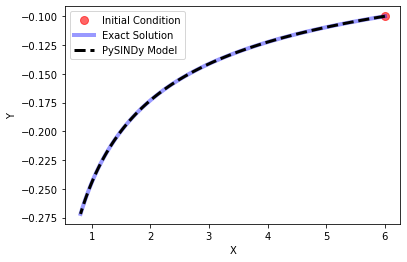

In [13]:
plt.figure()
plt.plot(x0, y0, "ro", label="Initial Condition", alpha=0.6, markersize=8)
plt.plot(x_test, y_test, "b", label="Exact Solution", alpha=0.4, linewidth=4)
plt.plot(sim[:, 0], sim[:, 1], "k--", label="PySINDy Model", linewidth=3)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

# Lorentz 01

In [14]:
def Lorentz(Yo, t):
    x, y, z = Yo
    r = 28.0
    s = 10.0
    b = 8.0/3.0
    dx = s * (y - x)
    dy = x * (r - z) - y
    dz = x * y - b * z
    return [dx, dy, dz]

In [15]:
l0 = [1.0, 1.0, 10.0]
t = np.linspace(0.0, 10.0, 10001)

In [16]:
from scipy.integrate import odeint
sol = odeint(Lorentz, l0, t)

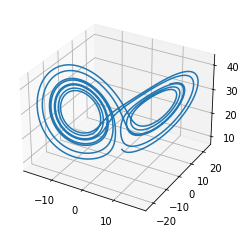

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2])
plt.show()

In [18]:
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]
t = np.linspace(0.0, 10.0, 10001)
X = np.stack((x, y, z), axis=-1)
differentiation_method = ps.FiniteDifference(order=2)
feature_library = ps.PolynomialLibrary(degree=3)
optimizer = ps.STLSQ(threshold=0.2)
model=ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y", "z"]
)
model.fit(X, t=t)
model.print()

x' = -10.000 x + 10.000 y
y' = 27.998 x + -1.000 y + -1.000 x z
z' = -2.667 z + 1.000 x y


In [19]:
x0 = 2.0
y0 = 3.0
z0 = 16.0

t_test = np.linspace(0.0, 10.0, 10001)

sol = odeint(Lorentz, [x0, y0, z0], t_test)
sim = model.simulate([x0, y0, z0], t=t_test)

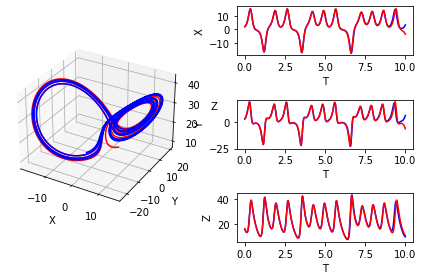

In [20]:
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2], "red")
ax.plot3D(sim[:, 0], sim[:, 1], sim[:, 2], "blue")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax2 = fig.add_subplot(322)
ax2.plot(t_test, sol[:, 0], "blue")
ax2.plot(t_test, sim[:, 0], "red")
ax2.set_xlabel("T")
ax2.set_ylabel("X")
ax3 = fig.add_subplot(324)
ax3.plot(t_test, sol[:, 1], "blue")
ax3.plot(t_test, sim[:, 1], "red")
ax3.set_xlabel("T")
ax3.set_ylabel("Y")
ax4 = fig.add_subplot(326)
ax4.plot(t_test, sol[:, 2], "blue")
ax4.plot(t_test, sim[:, 2], "red")
ax4.set_xlabel("T")
ax4.set_ylabel("Z")
fig.tight_layout()
plt.show()

# Lorentz 02

In [21]:
def Lorentz(Y, t):
    x, y, z = Y
    r = 28.0
    s = 10.0
    b = 8.0/3.0
    dx = s * (y - x)
    dy = x * (r - z) - y
    dz = x * y - b * z
    return [dx, dy, dz]

In [22]:
X0 = [1.0, 1.0, 10.0]
t = np.linspace(0.0, 10.0, 10001)

In [23]:
t

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
       1.000e+01])

In [24]:
from scipy.integrate import odeint
sol = odeint(Lorentz, X0, t)

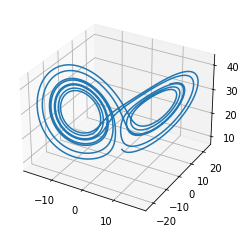

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2])
plt.show()

In [26]:
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 0] * sol[:, 1]
z[0] = X0[2]
for i in range(1, x.size):
    z[i]= z[i - 1] + (x[i] * y[i] - 8.0/3.0 * z[i - 1]) * (t[i] - t[i - 1])
#     z[i]= z[i - 1] + (x[i] * y[i] - z[i - 1]) * (t[i] - t[i - 1])
t = np.linspace(0.0, 10.0, 10001)
X = np.stack((x, y, z), axis=-1)
differentiation_method = ps.FiniteDifference(order=2)
feature_library = ps.PolynomialLibrary(degree=3)
optimizer = ps.STLSQ(threshold=0.2)
model=ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x", "y", "z"]
)
model.fit(X, t=t)
model.print()


x' = -10.000 x + 10.000 y
y' = 27.761 x + -0.887 y + -0.994 x z
z' = -2.679 z + 1.003 x y


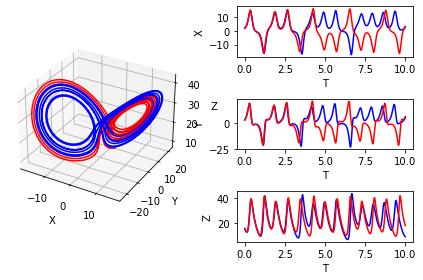

In [27]:
x0 = 2.0
y0 = 3.0
z0 = 16.0

t_test = np.linspace(0.0, 10.0, 10001)

sol = odeint(Lorentz, [x0, y0, z0], t_test)
sim = model.simulate([x0, y0, z0], t=t_test)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2], "red")
ax.plot3D(sim[:, 0], sim[:, 1], sim[:, 2], "blue")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax2 = fig.add_subplot(322)
ax2.plot(t_test, sol[:, 0], "blue")
ax2.plot(t_test, sim[:, 0], "red")
ax2.set_xlabel("T")
ax2.set_ylabel("X")
ax3 = fig.add_subplot(324)
ax3.plot(t_test, sol[:, 1], "blue")
ax3.plot(t_test, sim[:, 1], "red")
ax3.set_xlabel("T")
ax3.set_ylabel("Y")
ax4 = fig.add_subplot(326)
ax4.plot(t_test, sol[:, 2], "blue")
ax4.plot(t_test, sim[:, 2], "red")
ax4.set_xlabel("T")
ax4.set_ylabel("Z")
fig.tight_layout()
plt.show()

# Example 03

In [1]:
#u = 2*np.exp(-0.05)


In [7]:
def ISR(G):
    if(G <= 2.5):
        return 0.0
    elif(G <= 8.13):
        return 0.0139 * (G - 2.5) + 0.0103 * (G - 2.5) * (G - 2.5)
    else:
        return 0.405 + 0.348 * (np.tanh(0.793) * (G - 9.3) + np.tanh(0.793) * (9.3 - 8.13))
def HOMA(Y, t):
    a = 1000.0 / 6.945
    R = 12.90 * a
    Rl = 146.0 * a
    k1 = 0.032 / a
    G, Ip, It, Ih, Il = Y
    dG = 2.33 * (1.0 - 0.885 * G / (G + 8.0)) * (1.0 - np.tanh(0.0755 * Ip)) - (0.4 * np.tanh(0.45 * G) + 0.5 * G / (G + 8.0) + 8.434 * (G/(G + 8.0)) * (0.0838 + (Ip/(Ip + 22.0)) * (Ip/(Ip + 22.0))))
    dIp = 0.875 * (Ih - Ip) / 2.75 - k1 * (R - It) * Ip + 0.019 * It
    dIt = k1 * (R - It) * Ip - (0.019 + 0.049) * It
    dIh = (a * ISR(G) - 0.875 * (Ih - Ip)) / 0.22 - k1 * (Rl - Il) * Ih + 0.019 * Il
    dIl = k1 * (Rl - Il) * Ih - (0.019 + 0.049) * Il
    return [dG, dIp, dIt, dIh, dIl]

In [8]:
t = np.linspace(0.0, 100.0, 100001)
Y0 = [4.723699 + 10.0, 5.410050, 32.271581, 10.379873, 689.759051]
sol = odeint(HOMA, Y0, t)

In [9]:
t

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 9.9998e+01, 9.9999e+01,
       1.0000e+02])

In [10]:
sol

array([[ 14.723699  ,   5.41005   ,  32.271581  ,  10.379873  ,
        689.759051  ],
       [ 14.7229133 ,   5.41024076,  32.27158103,  11.57757342,
        689.76176075],
       [ 14.72212759,   5.41081071,  32.27158121,  12.76502515,
        689.76985908],
       ...,
       [  4.72275732,   5.41054362,  32.36056941,  10.37522486,
        689.55474913],
       [  4.72275739,   5.41054358,  32.36056346,  10.37522516,
        689.55474249],
       [  4.72275747,   5.41054354,  32.3605575 ,  10.37522546,
        689.55473585]])

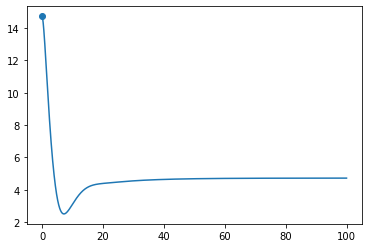

In [11]:
plt.figure()
plt.plot(t, sol[:, 0])
plt.scatter(t[0], sol[0, 0])

In [32]:

from pysindy import SINDy

t = np.linspace(0.0, 100.0, 100001)
Y0 = [4.723699 + 10.0, 5.410050, 32.271581, 10.379873, 689.759051]
sol = odeint(HOMA, Y0, t)

G = sol[:, 0]
Ip = sol[:, 1]
It = sol[:, 2]
Ih = sol[:, 3]
Il = sol[:, 4]
X = np.stack((G, Ip, It, Ih, Il), axis=-1)
t = np.linspace(0.0, 100.0, 100001)

differentiation_method=ps.SmoothedFiniteDifference(order=2)
# functions = [lambda x : np.tanh(x), lambda x : x / (x + 8.0), lambda x : x / (x + 22.0)]
# functions = [lambda x : x / (x + 8.0), lambda x : x / (x + 22.0)]
# feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=2), ps.CustomLibrary(library_functions=functions), ps.FourierLibrary()])
# feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=2), ps.CustomLibrary(library_functions=functions)])
feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=1)])
opt = ps.STLSQ(threshold = 0.001 , alpha = 0.5)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer = opt,
    feature_names=["G", "Ip", "It", "Ih", "Il"]
)
model.fit(X, t=t)
model.print()

G' = 0.736 1 + -0.075 G + -0.076 Ip + 0.002 It + -0.002 Ih
Ip' = -0.120 1 + 0.009 G + -0.717 Ip + 0.021 It + 0.317 Ih
It' = 0.120 1 + -0.009 G + 0.399 Ip + -0.070 It + 0.002 Ih
Ih' = -413.359 1 + 87.585 G + -13.336 Ip + -8.969 It + -5.215 Ih + 0.611 Il
Il' = 0.578 1 + 0.583 G + -0.541 Ip + -0.246 It + 4.443 Ih + -0.056 Il


In [26]:
X0 = [4.723699 + 6.0, 5.410050, 32.271581, 10.379873, 689.759051]
G0 = [4.723699 + 6.0]
t_test = np.linspace(0.0, 10.0, 1001)


In [27]:
# sol = odeint(HOMA, X0, t_test)
sol = odeint(HOMA, X0, t_test)

In [29]:
# sim = model.simulate(X0, t=t_test)
sim = model.simulate(X0, t=t_test)

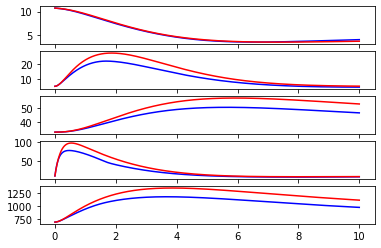

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(511)
ax1.plot(t_test, sol[:, 0], "blue")
ax1.plot(t_test, sim[:, 0], "red")
ax2 = fig.add_subplot(512)
ax2.plot(t_test, sol[:, 1], "blue")
ax2.plot(t_test, sim[:, 1], "red")
ax3 = fig.add_subplot(513)
ax3.plot(t_test, sol[:, 2], "blue")
ax3.plot(t_test, sim[:, 2], "red")
ax4 = fig.add_subplot(514)
ax4.plot(t_test, sol[:, 3], "blue")
ax4.plot(t_test, sim[:, 3], "red")
ax5 = fig.add_subplot(515)
ax5.plot(t_test, sol[:, 4], "blue")
ax5.plot(t_test, sim[:, 4], "red")
plt.show()

In [38]:
import pylops
plt.close("all")
np.random.seed(10)

In [39]:
#signal creation in frequency domain
ifreqs = [41,25,66]
amps = [1.0,1.0,1.0]
N= 200
nfft = 2**11
dt= 0.004
t=np.arange(N)*dt
f=np.fft.rfftfreq(nfft,dt)
FFTop = 10*pylops.signalprocessing.FFT(N,nfft=nfft,real=True)
X=np.zeros(nfft//2 + 1,dtype="complex128")
X[ifreqs] = amps
x= FFTop.H * X
print(f)
# X contains 3 non - zero elements rest are zeros

[0.00000000e+00 1.22070312e-01 2.44140625e-01 ... 1.24755859e+02
 1.24877930e+02 1.25000000e+02]


(-0.0398, 0.8358000000000001, -0.5341666861485157, 1.007579366007072)

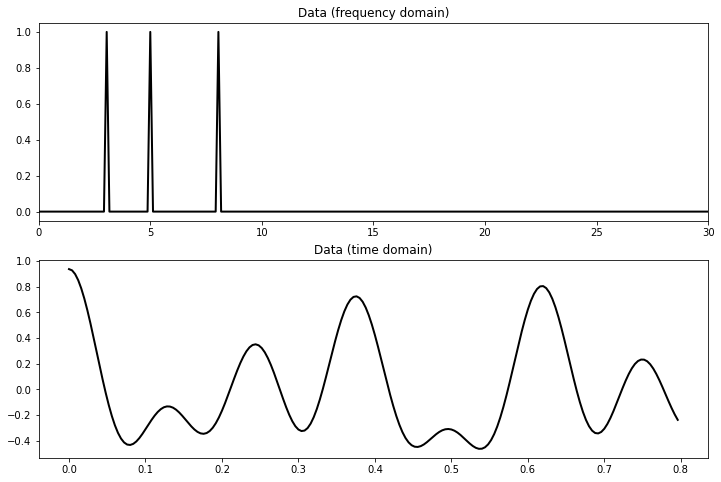

In [40]:
#Plotting all the input signals


fig,axs = plt.subplots(2,1,figsize=(12,8))

#plot with f and abs(X)

axs[0].plot(f,np.abs(X), "k", lw=2)

#limit abd title
axs[0].set_xlim(0,30)
axs[0].set_title("Data (frequency domain)")

#plot number two for time domain for x and t

axs[1].plot(t,x,"k",lw=2)


#limit abd title
axs[1].set_title("Data (time domain)")
axs[1].axis("tight")


In [41]:
# We will subsample(take a part of sample, 
#where sample is a part of population)

perc_subsampling = 0.2
Nsub = int(np.round(N*perc_subsampling))
# Nsub = 40

iava = np.sort(np.random.permutation(np.arange(N))[:Nsub])

# iava.shape[0] = 40

# Creating a Restriction Operator R from y = R*x

Rop = pylops.Restriction(N, iava, dtype = "float64")

#Rop.shape[0] = 40 , Rop.shape[0]=200

y= Rop * x

ymask = Rop.mask(x)
# print(y)
# print(x)
# masked array may have missing or invalid entries


In [49]:
ymask

masked_array(data=[--, 0.9277278591147233, 0.8987167230297575, --, --,
                   0.708069478726522, --, --, --, --, 0.18413622170762148,
                   --, --, --, --, --, --, --, --, -0.430779438292039,
                   -0.43402548934120705, --, --, --, --, --, --, --, --,
                   --, --, --, --, --, --, -0.15883823423473953, --, --,
                   --, -0.26236860995167866, --, --, --, --, --, --,
                   -0.3253453080350104, -0.29952582328667937, --, --, --,
                   --, -0.045328323812476944, --, --, 0.1473716736953946,
                   --, --, --, 0.32724939575178924, --,
                   0.3510343350662738, --, 0.3221326595409164, --, --, --,
                   --, --, -0.0068536557602791705, --, --, --, --, --,
                   -0.31393122936144247, -0.3255488594771446, --,
                   -0.3023067768797871, --, --, --, --, --, --, --, --,
                   0.3762574505819595, --, --, --, 0.6608443824573453, --,
     

Text(0.5, 1.0, 'Data restriction')

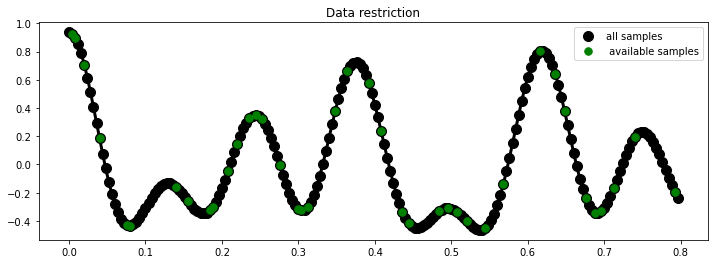

In [47]:
# Visualizing our data
fig = plt.figure (figsize = (12, 4))

plt.plot(t,x,"k",lw=3)
# plotting all samples of x matrix with black dot shaped of size 20
plt.plot(t,x,".k", ms=20 , label = "all samples")

# plotting masked samples of x matrix with green dot shaped of size 15
plt.plot(t, ymask, ".g" , ms=15 , label = " available samples")

#legend and title
plt.legend()
plt.title("Data restriction")

In [76]:
xinv_1 = Rop/y
xinv_1

array([ 0.        ,  0.92772786,  0.89871672,  0.        ,  0.        ,
        0.70806948,  0.        ,  0.        ,  0.        ,  0.        ,
        0.18413622,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.43077944,
       -0.43402549,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.15883823,  0.        ,  0.        ,  0.        , -0.26236861,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.32534531, -0.29952582,  0.        ,  0.        ,
        0.        ,  0.        , -0.04532832,  0.        ,  0.        ,
        0.14737167,  0.        ,  0.        ,  0.        ,  0.3272494 ,
        0.        ,  0.35103434,  0.        ,  0.32213266,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.00

In [77]:
sparse_1 = np.count_nonzero(xinv_1)
sparse_1

40

In [78]:
xinv_2 = pylops.optimization.leastsquares.RegularizedInversion(Rop, [], y, **dict(damp=0, iter_lim=10, show = 1))

 
LSQR            Least-squares solution of  Ax = b
The matrix A has 40 rows and 200 columns
damp = 0.00000000000000e+00   calc_var =        0
atol = 1.00e-08                 conlim = 1.00e+08
btol = 1.00e-08               iter_lim =       10
 
   Itn      x[0]       r1norm     r2norm   Compatible    LS      Norm A   Cond A
     0  0.00000e+00   2.658e+00  2.658e+00    1.0e+00  3.8e-01
     1  0.00000e+00   0.000e+00  0.000e+00    0.0e+00  0.0e+00   0.0e+00  0.0e+00
 
LSQR finished
Ax - b is small enough, given atol, btol                  
 
istop =       1   r1norm = 0.0e+00   anorm = 0.0e+00   arnorm = 0.0e+00
itn   =       1   r2norm = 0.0e+00   acond = 0.0e+00   xnorm  = 2.7e+00
 


In [79]:
sparse_2 = np.count_nonzero(xinv_2)
sparse_2

40

In [80]:
xinv_formx0 = pylops.optimization.leastsquares.RegularizedInversion(Rop , [], y, x0 = np.ones(N)
, **dict(damp=0, iter_lim=10, show= 0 ))


#normal equation inversion
xne = pylops.optimization.leastsquares.NormalEquationsInversion(Rop , [], y)

In [81]:
sparse_3 = np.count_nonzero(xinv_formx0)
sparse_3

200

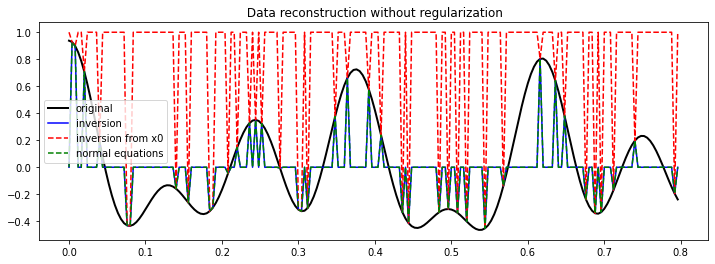

In [82]:
# visulaizing different inversion result
fig = plt.figure(figsize = (12,4))

#original data

plt.plot( t, x , "k" , lw = 2 , label="original")

# xinv_2
plt.plot( t, xinv_2 , "b" , ms=10 , label = "inversion")


#xinv_fromx0

plt.plot(t, xinv_formx0 , "--r" , ms=10 , label = "inversion from x0" )

#noraml equatoin inversion
plt.plot(t, xne, "--g" , label= "normal equations")


#legend and title
plt.title(" Data reconstruction without regularization")
plt.legend()

In [83]:
# starting by regularizing normal eqautiohs

# creating regularization operator
D2op = pylops.SecondDerivative(N , dims = None , dtype = "float64")

# regularized inversion 
epsR = np.sqrt(0.1)
epsI = np.sqrt(1e-4)

xne = pylops.optimization.leastsquares.NormalEquationsInversion(Rop , [D2op], y , epsI = epsI , epsRs = [epsR], returninfo = False , **dict(maxiter = 50))

In [84]:
ND2op = pylops.MatrixMult((D2op.H * D2op).tosparse())

xne1 = pylops.optimization.leastsquares.NormalEquationsInversion(Rop ,[], y, NRegs = [ND2op], epsI = epsI , epsNRs = [epsR], returninfo = False , **dict(maxiter = 50))

In [85]:
xreg = pylops.optimization.leastsquares.RegularizedInversion( Rop , [D2op] , y , epsRs = [np.sqrt(0.1)], returninfo = False , **dict(damp=np.sqrt(1e-4), iter_lim = 50 , show = 0))

In [86]:
xreg.shape[0]

200

In [69]:
# Preconditioned Problem , PP converges much faster to its solution than its corresponding regularized problem 


# create a regularization parameter 
Sop = pylops.Smoothing1D(nsmooth = 11 , dims=[N], dtype = "float64")


# Invert for interpolated signal

xprec = pylops.optimization.leastsquares.PreconditionedInversion( Rop, Sop, y, returninfo = False, **dict(damp=np.sqrt(1e-9), iter_lim = 20 , show = 0))

NameError: name 'xprec' is not defined

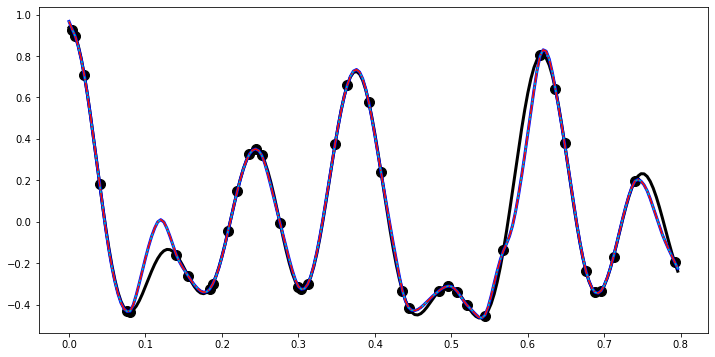

In [87]:
# visulaizing all solution
fig = plt.figure( figsize = (12,6))

# plot for availiable samples

plt.plot(t[iava], y , ".k", ms=20 , label = "availiable samples")


#original sample
plt.plot(t, x , "k" , lw = 3, label="original")

#normal equations
plt.plot(t, xne, "b" , lw = 3 , label="normal equatuons")

#normal equations with direct D^tD

plt.plot(t, xne1, "c" , label="normal equations with direct D^TD")

#regularized 
plt.plot(t, xreg , "-.r" , label="regularized")

# preconditioned equations
plt.plot(t, xprec , "--g" , lw= 3 , label = "preconditioned equations")


#legend and title
plt.legend()
plt.title("Data reconstruction with regularization")


#zooming a liitle bit

subax = fig.add_axes([0.95, 0.1 , 0.5, 0.96])
subax.plot(t[iava] , y , ".k ", ms= 20)
subax.plot(t, x, "k" , lw = 3)
subax.plot(t, x, "k", lw=3)
subax.plot(t, xne, "b", lw=3)
subax.plot(t, xne1, "--c", lw=3)
subax.plot(t, xreg, "-.r", lw=3)
subax.plot(t, xprec, "--g", lw=3) 
subax.set_xlim(0.05, 0.3)

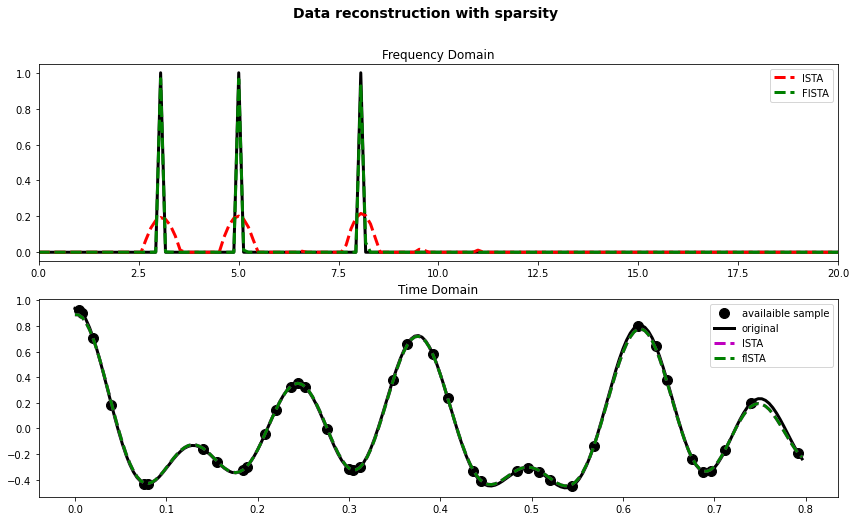

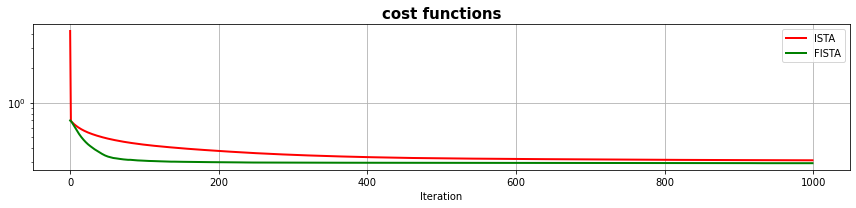

In [71]:
pista, niteri, costi = pylops.optimization.sparsity.ISTA(Rop * FFTop.H, y, niter =1000 , eps = 0.1 , tol = 1e-7, returninfo=True)

xista = FFTop.H * pista

pfista, niterf , costf= pylops.optimization.sparsity.FISTA(Rop * FFTop.H , y , niter = 1000 , eps=0.1, tol= 1e-7 , returninfo = True)

xfista = FFTop.H * pfista

fig, axs = plt.subplots( 2, 1 , figsize=(12, 8 ))
fig.suptitle("Data reconstruction with sparsity " , fontsize = 14 , fontweight = "bold" , y=0.9)


#plotting 
axs[0].plot(f , np.abs(X) , "k" , lw=3)
axs[0].set_xlim(0,20)

#ploting various result for frequency domain
axs[0].plot(f, np.abs(pista), "--r" , lw =3 , label = "ISTA")
axs[0].plot(f, np.abs(pfista), "--g" , lw =3 , label = "FISTA") # gives good result
axs[0].set_title("Frequency Domain")
axs[0].legend()


#plot for second axis for time domain

#original data
axs[1].plot(t[iava], y , ".k" , ms = 20, label = "availaible sample")
axs[1].plot(t, x, "k" , lw =3 , label = "original")

# #computed data
axs[1].plot(t, xista, "--m" , lw =3 , label = "ISTA")
axs[1].plot(t, xista, "--g" , lw =3 , label = "fISTA")
axs[1].set_title("Time Domain")
axs[1].legend()
axs[1].axis("tight")

# adjust the heading of plot and axsplot
plt.tight_layout()
plt.subplots_adjust(top=0.8)


#cost functon plot 
fig, ax = plt.subplots(1,1, figsize = (12 , 3))
ax.semilogy(costi, "r" , lw= 2 , label = "ISTA")
ax.semilogy(costf , "g", lw = 2, label = "FISTA")

#set titlee and legend
ax.set_title("cost functions" , size = 15 , fontweight = "bold")
ax.set_xlabel("Iteration")
ax.legend()
ax.grid(True)
plt.tight_layout()
# we can see fista converges much faster than ista

# We can see changing parametrization of the model and imposing sparsity in the fourier domain has given an extra improvement to our ability of recovering the underlying densely sampled input signal.

In [47]:
pip install spgl1

Note: you may need to restart the kernel to use updated packages.


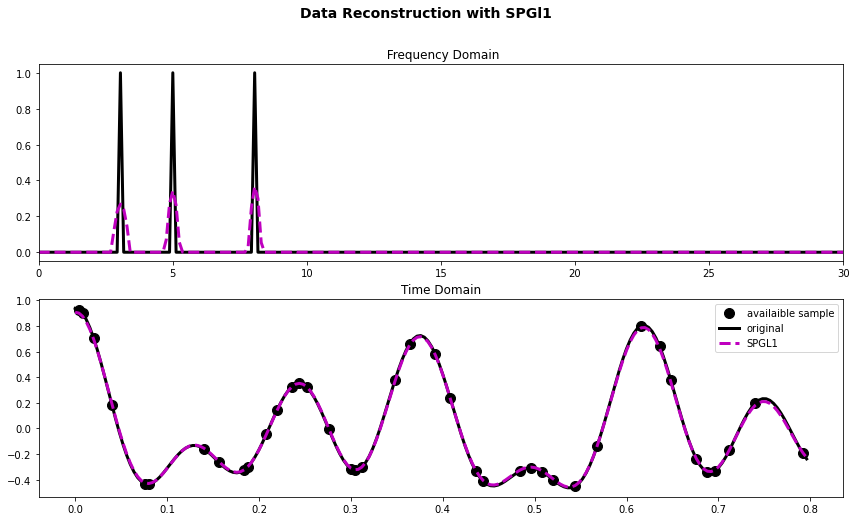

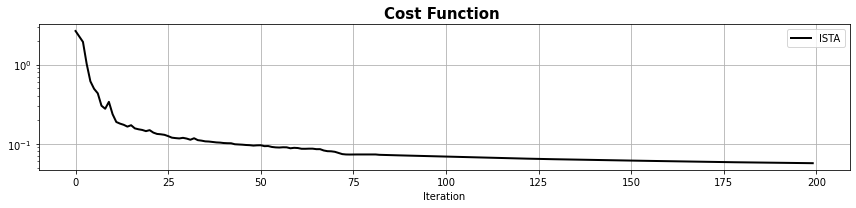

In [72]:
# Finally we consider a slightly different cost function (note that in this case we try to solve a consrained problem )
# Popular slver to solve such kind of cost function is called spgl1

xspgl1 , pspgl1, info = pylops.optimization.sparsity.SPGL1( Rop , y , FFTop , tau = 3 , iter_lim = 200)

fig , axs = plt.subplots(2,1, figsize = (12, 8))
fig.suptitle("Data Reconstruction with SPGl1 ", fontsize = 14 , fontweight = "bold", y = 0.9)
#for frequency domain

axs[0].plot(f, np.abs(X) , "k" , lw= 3)
axs[0].plot(f , np.abs(pspgl1) , "--m" , lw = 3)
axs[0].set_xlim(0,30)
axs[0].set_title( " Frequency Domain")


#for time domain
axs[1].plot( t[iava], y , ".k" , ms = 20 , label = "availaible sample")
axs[1].plot(t , x , "k", lw = 3, label = "original")
axs[1].plot(t , xspgl1 , "--m" , lw = 3 , label ="SPGL1")
axs[1].set_title("Time Domain")
axs[1].axis("tight")
axs[1].legend()
plt.tight_layout()
plt.subplots_adjust(top = 0.8)

#Cost function Convergence
fig, ax = plt.subplots (1,1, figsize=(12,3))
ax.semilogy(info["rnorm2"] , "k", lw = 2 , label = "ISTA")
ax.set_title( "Cost Function " , size = 15 , fontweight = "bold")
ax.set_xlabel("Iteration")
ax.legend()
ax.grid(True)
plt.tight_layout()


# SSR OPTIMIZERS


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from sklearn.metrics import mean_squared_error

import pysindy as ps

# Ignore odeint warnings when model is unstable
import warnings
from scipy.integrate.odepack import ODEintWarning
warnings.filterwarnings("ignore", category=ODEintWarning)

# Seed the random number generators for reproducibility
np.random.seed(100)

# integration keywords for solve_ivp, typically needed for chaotic systems
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

In [75]:
dt = .002
t_train = np.arange(0, 10, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [-8, 8, 27]
x_train = solve_ivp(Lorentz, t_train_span, x0_train, 
                    t_eval=t_train, **integrator_keywords).y.T
rmse = mean_squared_error(x_train, np.zeros((x_train).shape), squared=False)
x_train = x_train + np.random.normal(0, rmse / 10.0, x_train.shape)
feature_names = ['x', 'y', 'z']
                    
ssr_optimizer = SSR(alpha = .5)

model = ps.SINDy(optimizer=ssr_optimizer)
model.fit(x_train, t=dt)

for i in range(3):
    plt.plot(t_train, x_train[:, i], label=feature_names[i])
    
plt.xlabel('t', fontsize=16)
plt.legend(fontsize=14)
plt.title('Lorenz training data with 10% noise')
plt.show()

TypeError: cannot unpack non-iterable float object

# Let’s start with a simple example, where we create a dense mixing matrix and a sparse signal and we use OMP and ISTA to recover such a signal

In [ ]:
N, M = 15, 20
A = np.random.randn(N, M)
A = A / np.linalg.norm(A, axis=0)
Aop = pylops.MatrixMult(A)

x = np.random.rand(M)
x[x < 0.9] = 0
y = Aop * x


In [ ]:
y

In [105]:
eps = 1e-2
maxit = 500
x_mp = pylops.optimization.sparsity.OMP(Aop, y, maxit, niter_inner=0, sigma=1e-4)[0]
x_omp = pylops.optimization.sparsity.OMP(Aop, y, maxit, sigma=1e-4)[0]
x_irls = pylops.optimization.sparsity.IRLS(
    Aop, y, 50, epsI=1e-5, kind="model", **dict(iter_lim=10)
)[0]

# ISTA
x_ista = pylops.optimization.sparsity.ISTA(
    Aop, y, maxit, eps=eps, tol=1e-3, returninfo=True
)[0]

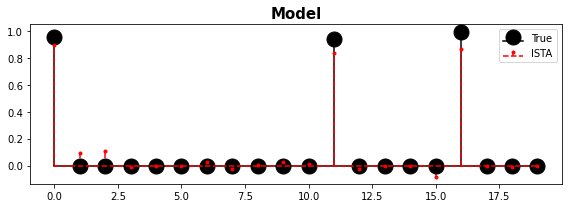

In [107]:

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
m, s, b = ax.stem(x, linefmt="k", basefmt="k", markerfmt="ko", label="True")
plt.setp(m, markersize=15)
# m, s, b = ax.stem(x_mp, linefmt="--c", basefmt="--c", markerfmt="co", label="MP")
# plt.setp(m, markersize=10)
# m, s, b = ax.stem(x_omp, linefmt="--g", basefmt="--g", markerfmt="go", label="OMP")
# plt.setp(m, markersize=7)
# m, s, b = ax.stem(x_irls, linefmt="--m", basefmt="--m", markerfmt="mo", label="IRLS")
# plt.setp(m, markersize=7)
m, s, b = ax.stem(x_ista, linefmt="--r", basefmt="--r", markerfmt="ro", label="ISTA")
plt.setp(m, markersize=3)
ax.set_title("Model", size=15, fontweight="bold")
ax.legend()
plt.tight_layout()

In [174]:

X = np.ones((1000,2))
X

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [175]:
feature_library = ps.PolynomialLibrary(degree=2)

feature_library.fit_transform(X)


array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [176]:
feature_library.get_feature_names()


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [163]:
feature_library.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2],
       [3, 0],
       [2, 1],
       [1, 2],
       [0, 3]], dtype=int64)

In [2]:
import sympy as sym
from sympy import *

#x0 , x1, x2, x3, x4 = sym.symbols('xo, x1, x2, x3, x4')
from sympy.abc import x, y

In [7]:
Theta = sym.Matrix([[1, x, y, x**2, y**2, x*y]])
i=1
while i<10000:
    Theta = Theta.row_insert(1, Matrix([[1, x, y, x**2, y**2, x*y]]))
    i = i+1

In [59]:
Theta.shape[0]

10000

In [55]:
# n = 1000  # for 2 random indices
# index = np.random.choice(G.shape[0], n, replace=False)  
G_random = G[:10000]
G_random

array([14.723699  , 14.7229133 , 14.72212759, ...,  3.11634489,
        3.11664069,  3.11693648])

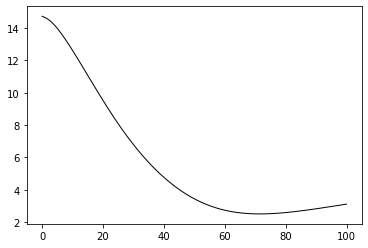

In [56]:
#plt.figure()
t = np.linspace(0.0, 100.0, 10000)
plt.plot(t , G_random, "k"  , lw = 1)

In [69]:
eps = 1e-2
maxit = 500
x_mp = pylops.optimization.sparsity.OMP(Aop, y, maxit, niter_inner=0, sigma=1e-4)[0]
x_omp = pylops.optimization.sparsity.OMP(Aop, y, maxit, sigma=1e-4)[0]

# IRLS
x_irls = pylops.optimization.sparsity.IRLS(
    Theta, G_random, 50, epsI=1e-5, kind="model", **dict(iter_lim=10)
)[0]

# ISTA
x_ista = pylops.optimization.sparsity.ISTA(
    Theta, G_random, maxit, eps=eps, tol=1e-3, returninfo=True
)[0]

NameError: name 'Aop' is not defined

In [2]:
plt.plot(t , x_ista, "k"  , lw = 1)
plt.figure()

NameError: name 'plt' is not defined

In [60]:
import sympy as sym
from sympy import *

#x0 , x1, x2, x3, x4 = sym.symbols('xo, x1, x2, x3, x4')
from sympy.abc import x, y
Theta = sym.Matrix([[1, x, y, x**2, y**2, x*y]])
i=1
while i<100001:
    Theta = Theta.row_insert(1, Matrix([[1, x, y, x**2, y**2, x*y]]))
    i = i+1

Theta.shape[0]

100001

In [1]:
Theta.shape[0]

NameError: name 'Theta' is not defined

In [89]:
G.shape[0]

100001

In [93]:
eps = 1e-2
maxit = 500
x_ista = pylops.optimization.sparsity.ISTA(
    Theta, G_random, maxit, eps=eps, tol=1e-3, returninfo=True
)[0]

AttributeError: 'MutableDenseMatrix' object has no attribute 'dtype'

In [82]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C283-2841

 Directory of C:\Users\Prajjwal\Documents\MS PROJECT\code

31-03-2022  21:20    <DIR>          .
31-03-2022  21:20    <DIR>          ..
31-03-2022  21:15    <DIR>          .ipynb_checkpoints
19-08-2021  11:13    <DIR>          CODE_PYTHON
19-08-2021  11:33    <DIR>          DATA
19-08-2021  11:20    <DIR>          DATA_PYTHON
31-03-2022  21:20            15,596 data_to_give.txt
19-02-2022  23:14            26,234 example_airy.png
30-03-2022  16:58           839,582 glucose_1.ipynb
30-03-2022  16:56           208,512 glucose_sparsity.ipynb
05-02-2022  16:03           270,248 Jan_MS_1.ipynb
09-02-2022  07:31           681,521 lecture4.ipynb
09-02-2022  07:13            37,710 plot_omp.ipynb
22-01-2022  21:56             6,628 simulating_in_python.ipynb
11-02-2022  09:55    <DIR>          sparsedynamics
11-02-2022  09:54         1,876,754 sparsedynamics.zip
               9 File(s)      3,962,785 bytes
               7 D

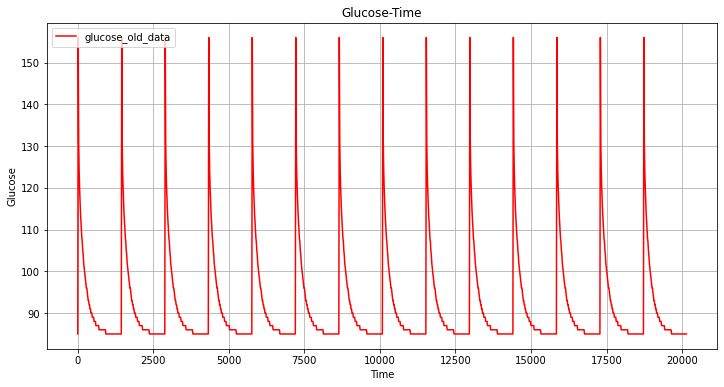

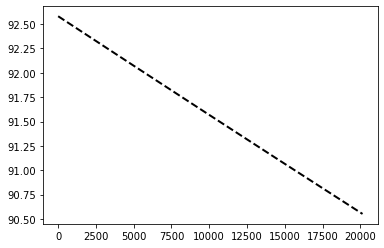

In [111]:
fig = plt.figure( figsize = (12,6))
x = np.loadtxt("data_to_give.txt" , usecols=0)
y = np.loadtxt("data_to_give.txt" , usecols=1)

#plt.plot(x,y ,'r--' , label="L=7" )
plt.plot(x ,y,'r', label="glucose_old_data" )
#plt.plot(x,q, 'g^', label="L=9")
plt.legend(loc="upper left")
plt.xlabel("Time")
plt.ylabel("Glucose")
plt.title('Glucose-Time')
plt.grid()
plt.show()

# #plt.ylim([-0.2, 0.2])
# #major grid lines
# plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)
# #minor grid lines
# plt.minorticks_on()
# plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1)
from scipy.optimize import curve_fit
# Function to calculate the exponential with constants a and b
def exponential(x, a, b):
    return a*np.exp(b*x)
pars, cov = curve_fit(f=exponential, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))
stdevs = np.sqrt(np.diag(cov))
res = y - exponential(x, *pars)
plt.plot(x, exponential(x, *pars), linestyle='--', linewidth=2, color='black')

In [112]:
%pylab inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz

Populating the interactive namespace from numpy and matplotlib


C:\Users\Prajjwal\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'exponential', 'cov']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


ModuleNotFoundError: No module named 'gplearn'

In [96]:
from pysindy import SINDy
# x = t
# t = np.linspace(0.0, 100.0, 100001)
# Y0 = [4.723699 + 10.0, 5.410050, 32.271581, 10.379873, 689.759051]
# sol = odeint(HOMA, Y0, t)

# G = y
# Ip = sol[:, 1]
# It = sol[:, 2]
# Ih = sol[:, 3]
# Il = sol[:, 4]
# X = np.stack((G, Ip, It, Ih, Il), axis=-1)
# t = np.linspace(0.0, 100.0, 100001)

differentiation_method=ps.FiniteDifference(order=2)
# functions = [lambda x : np.tanh(x), lambda x : x / (x + 8.0), lambda x : x / (x + 22.0)]
# functions = [lambda x : x / (x + 8.0), lambda x : x / (x + 22.0)]
# feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=2), ps.CustomLibrary(library_functions=functions), ps.FourierLibrary()])
# feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=2), ps.CustomLibrary(library_functions=functions)])
feature_library=ps.ConcatLibrary([ps.PolynomialLibrary(degree=1)])
opt = ps.STLSQ(threshold = 0.001 , alpha = 0.5)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer = opt,
    feature_names=["G", "Ip", "It", "Ih", "Il"]
)
model.fit(y, x)
model.print()

G' = 0.006 1


In [107]:
X0 = [4.723699 + 6.0, 5.410050, 32.271581, 10.379873, 689.759051]
G0 = [4.723699 + 6.0]
t_test = np.linspace(0.0, 10.0, 100001)
sim = model.simulate(G0, t=t_test)
sim.shape[0]

100001

IndexError: index 1 is out of bounds for axis 1 with size 1

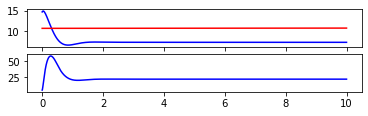

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(511)
ax1.plot(t_test, sol[:, 0], "blue")
ax1.plot(t_test, sim[:, 0], "red")
ax2 = fig.add_subplot(512)
ax2.plot(t_test, sol[:, 1], "blue")
ax2.plot(t_test, sim[:, 1], "red")
ax3 = fig.add_subplot(513)
ax3.plot(t_test, sol[:, 2], "blue")
ax3.plot(t_test, sim[:, 2], "red")
ax4 = fig.add_subplot(514)
ax4.plot(t_test, sol[:, 3], "blue")
ax4.plot(t_test, sim[:, 3], "red")
ax5 = fig.add_subplot(515)
ax5.plot(t_test, sol[:, 4], "blue")
ax5.plot(t_test, sim[:, 4], "red")
plt.show()